### This notebook contains Guessing Entropy Curve plots which were previosly calculated in **key_recovery.ipynb** and exported for each nibble in **ge_data/** and each modeling method (e.g. POIs vs Range POIs).

In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from scipy.interpolate import make_interp_spline

In [170]:
def plot_guessing_entropy_curve_all_nibbles(guessing_entropy, dataset, title, dir, filename):
    plt.figure(figsize=(10, 6))
    x = np.arange(len(guessing_entropy[0]))  # assuming all entries are same length
    
    for i in range(len(guessing_entropy)):
        y = np.array(guessing_entropy[i])
        if len(y) > 3:  # smoothing only makes sense with enough points
            x_smooth = np.linspace(x.min(), x.max(), 300)
            spline = make_interp_spline(x, y, k=3)  # cubic spline
            y_smooth = spline(x_smooth)
            plt.plot(x_smooth, y_smooth, label=f"Nibble {i}", color=f"C{i}", linestyle='-')
        else:
            plt.plot(x, y, label=f"Nibble {i}", color=f"C{i}", linestyle='--', marker='o')

    plt.xlabel("Number of Traces")
    plt.ylabel("Rank of True Key Guess")
    plt.title("Guessing Entropy Curve on " + title + " " + dataset)
    plt.grid(True)
    plt.legend()
    plt.show()

    dirs = f"figures/GE/{dir}"
    os.makedirs(dirs, exist_ok=True)
    plt.savefig(f"{dirs}/{filename}.png")

In [171]:
def plot_guessing_entropy_curve_one_nibble(guessing_entropy, dataset, idx, title, dir, filename):
    plt.figure(figsize=(10, 6))
    x = np.arange(len(guessing_entropy))  # assuming all entries are same length
    y = np.array(guessing_entropy)
    if len(y) > 3:  # smoothing only makes sense with enough points
        x_smooth = np.linspace(x.min(), x.max(), 300)
        spline = make_interp_spline(x, y, k=3)  # cubic spline
        y_smooth = spline(x_smooth)
        plt.plot(x_smooth, y_smooth, label=f"Nibble {idx}", color=f"C{idx}")
    else:
        plt.plot(x, y, label=f"Nibble {idx}", linestyle='--', marker='o', color=f"C{idx}")

    # plt.plot(guessing_entropy, label=f"Nibble {idx}", marker='o', markersize=3, linestyle='-', color=f"C{idx}")
    plt.xlabel("Number of Traces")
    plt.ylabel("Rank of True Key Guess")
    plt.title("Guessing Entropy Curve on " + title + " - " + dataset)
    plt.grid(True)
    plt.legend()
    plt.show()

    dirs = f"figures/GE/{dir}"
    os.makedirs(dirs, exist_ok=True)
    plt.savefig(f"{dirs}/{filename}.png")

In [172]:
def load_data(data_path, dataset_name, method, file_name):
    full_path = os.path.join(data_path, dataset_name, method)
    return np.load(f"{full_path}/{file_name}"), full_path

In [173]:
def load_and_plot_ge_all(data_path, dataset_name, method, file_name, title):
    entropies = []
    for nibble_idx in range(16):
        # Load the guessing entropy data
        data, file_path = load_data(data_path, dataset_name, method, f"ge_nibble_{nibble_idx}.npy")
        
        entropies.append(data)
        
    # Plot the guessing entropy curve
    plot_guessing_entropy_curve_all_nibbles(entropies, dataset_name, title, file_path, file_name)


In [174]:
def load_and_plot_ge_by_one(data_path, dataset_name, method, title):
    for nibble_idx in range(16):
        # Load the guessing entropy data
        data, file_path = load_data(data_path, dataset_name, method, f"ge_nibble_{nibble_idx}.npy")
        
        file_name = f"ge_nibble_{nibble_idx}"
        # Plot the guessing entropy curve
        plot_guessing_entropy_curve_one_nibble(data, dataset_name, nibble_idx, title, file_path, file_name)


In [175]:
ge_data_path = "ge_data/" 

In [176]:
def summary_ge(data_path, dataset_name, method):
    for nibble_idx in range(16):
        # Load the guessing entropy data
        data, file_path = load_data(data_path, dataset_name, method, f"ge_nibble_{nibble_idx}.npy")

        max = len(data)
        for i, ge_curve in enumerate(data):
            if i == 0:
                print(f"Nibble {nibble_idx} reached rank 0 at Trace: {ge_curve}")
                break
            if i == max - 1:
                print(f"Nibble {nibble_idx} never reached rank 0")
            

# POIs method

### random_pt_dataset

In [177]:
summary_ge(ge_data_path, "random_pt_dataset", "pois")

Nibble 0 reached rank 0 at Trace: 0
Nibble 1 reached rank 0 at Trace: 0
Nibble 2 reached rank 0 at Trace: 0
Nibble 3 reached rank 0 at Trace: 0
Nibble 4 reached rank 0 at Trace: 0
Nibble 5 reached rank 0 at Trace: 0
Nibble 6 reached rank 0 at Trace: 1
Nibble 7 reached rank 0 at Trace: 0
Nibble 8 reached rank 0 at Trace: 0
Nibble 9 reached rank 0 at Trace: 0
Nibble 10 reached rank 0 at Trace: 0
Nibble 11 reached rank 0 at Trace: 0
Nibble 12 reached rank 0 at Trace: 0
Nibble 13 reached rank 0 at Trace: 0
Nibble 14 reached rank 0 at Trace: 0
Nibble 15 reached rank 0 at Trace: 0


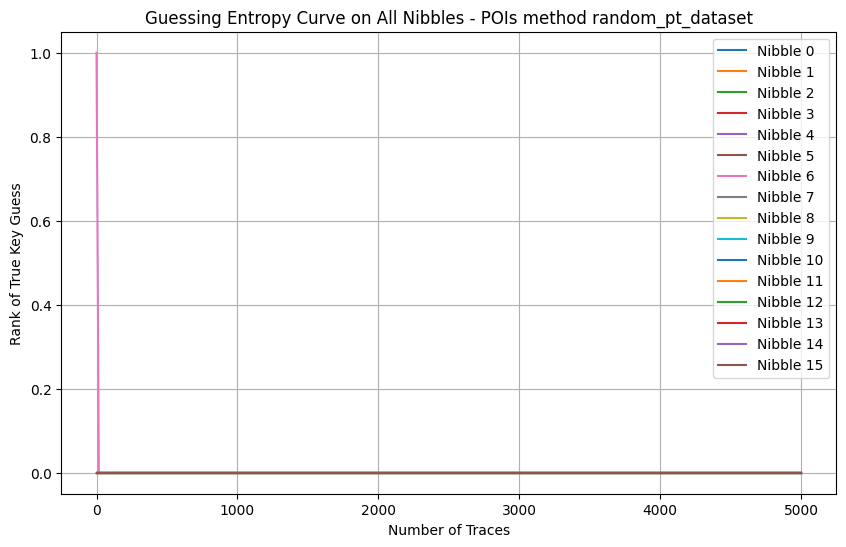

<Figure size 640x480 with 0 Axes>

In [178]:
load_and_plot_ge_all(ge_data_path, "random_pt_dataset", "pois", "ge_all_nibbles_pois", "All Nibbles - POIs method")

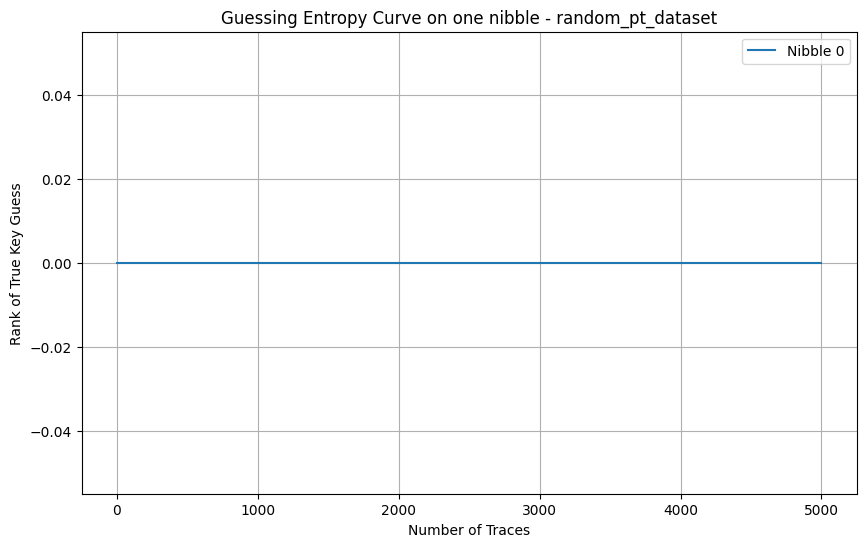

<Figure size 640x480 with 0 Axes>

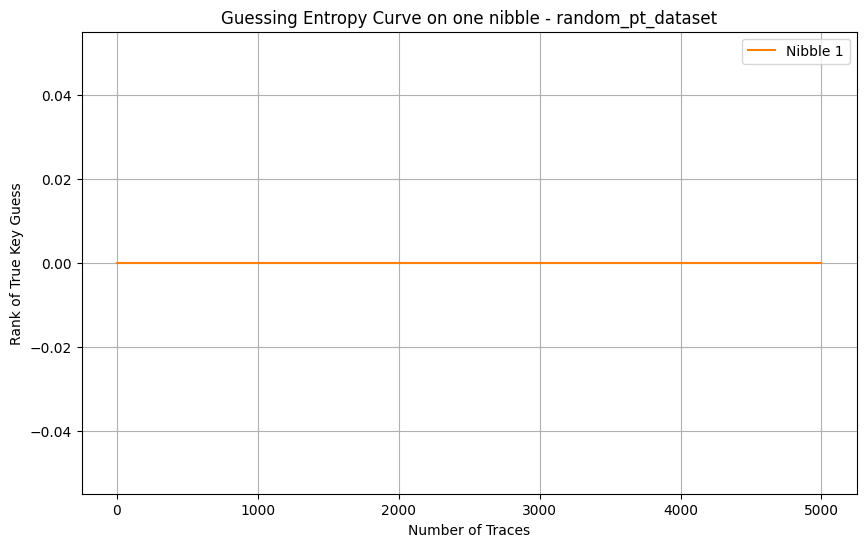

<Figure size 640x480 with 0 Axes>

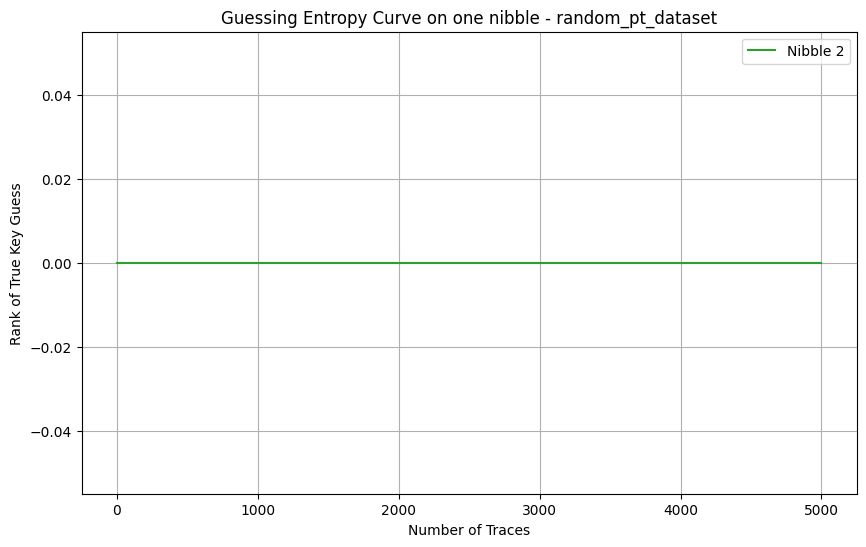

<Figure size 640x480 with 0 Axes>

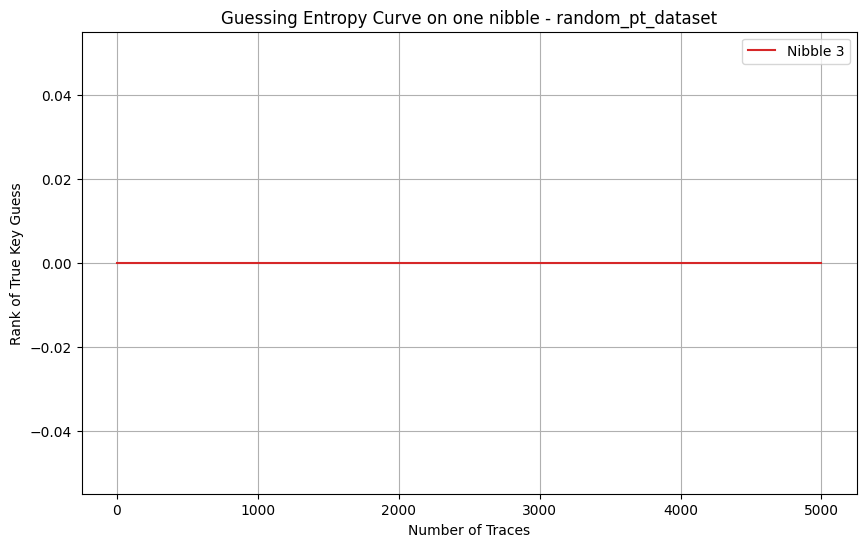

<Figure size 640x480 with 0 Axes>

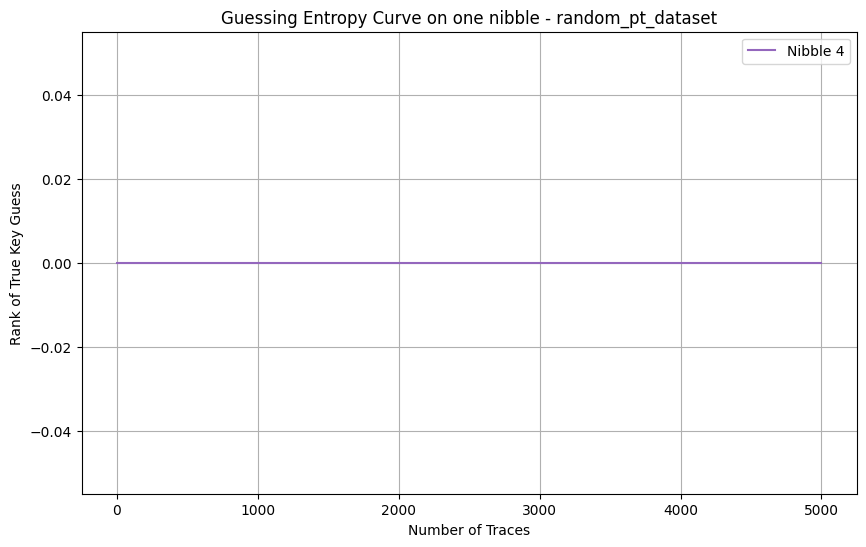

<Figure size 640x480 with 0 Axes>

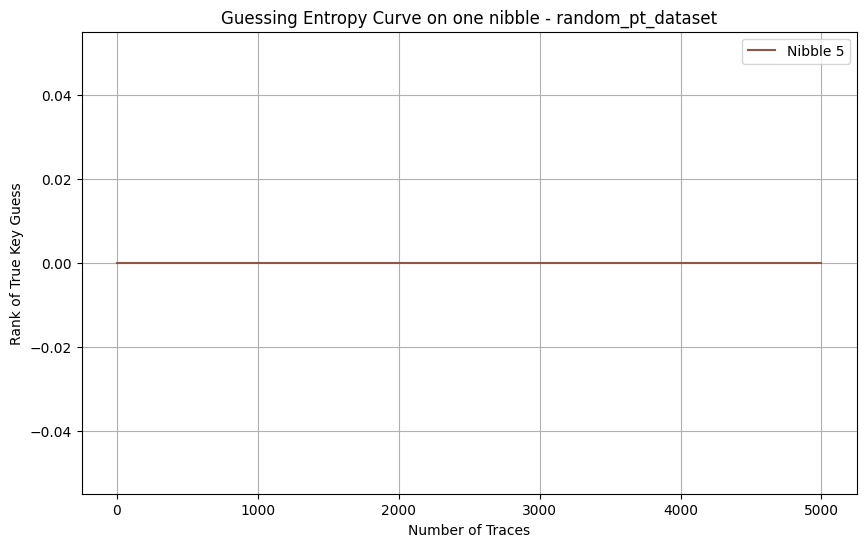

<Figure size 640x480 with 0 Axes>

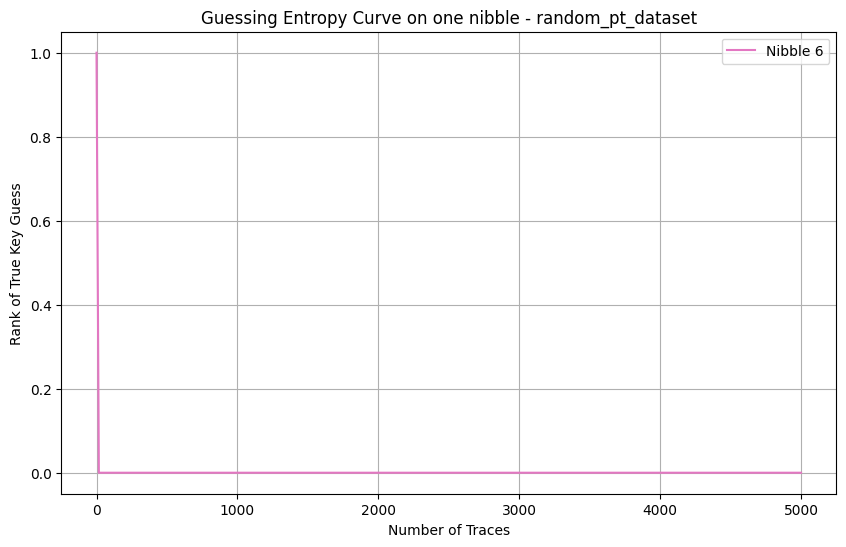

<Figure size 640x480 with 0 Axes>

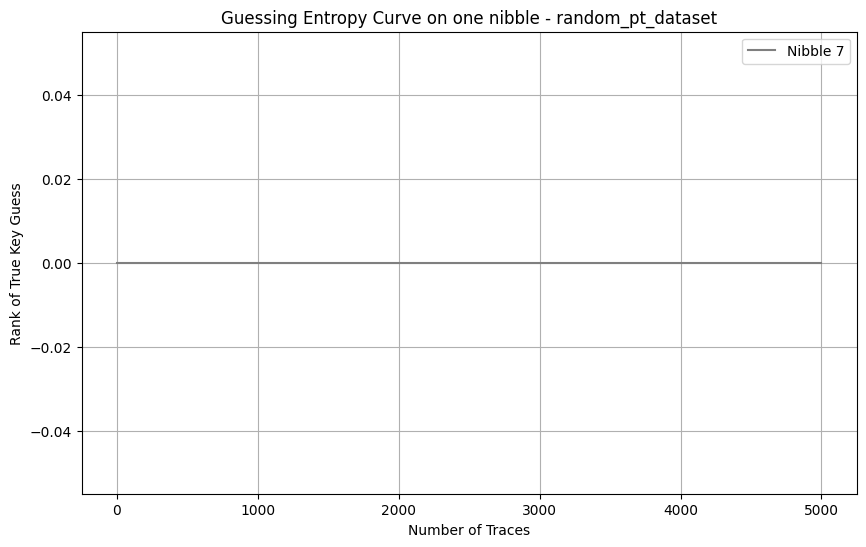

<Figure size 640x480 with 0 Axes>

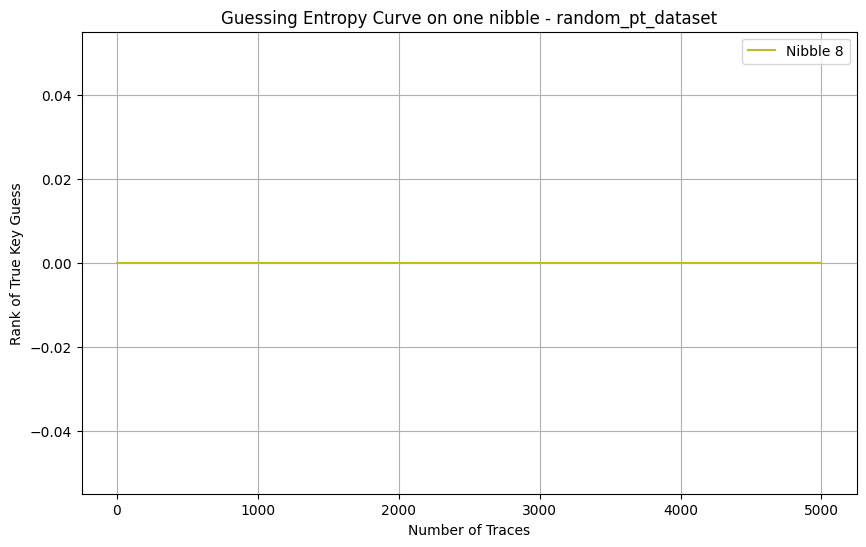

<Figure size 640x480 with 0 Axes>

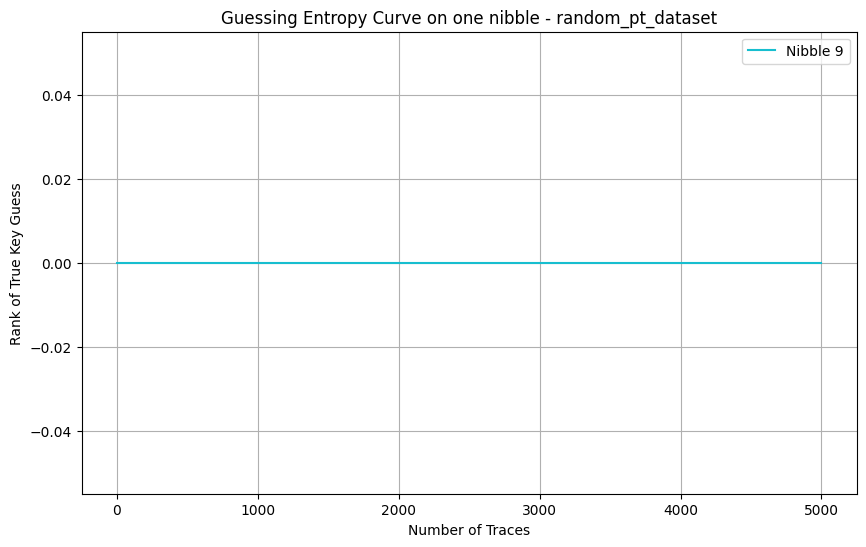

<Figure size 640x480 with 0 Axes>

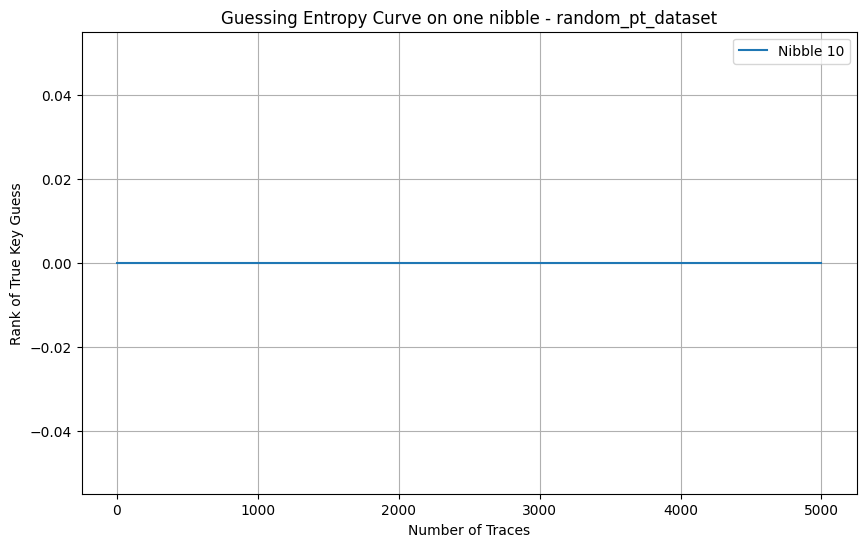

<Figure size 640x480 with 0 Axes>

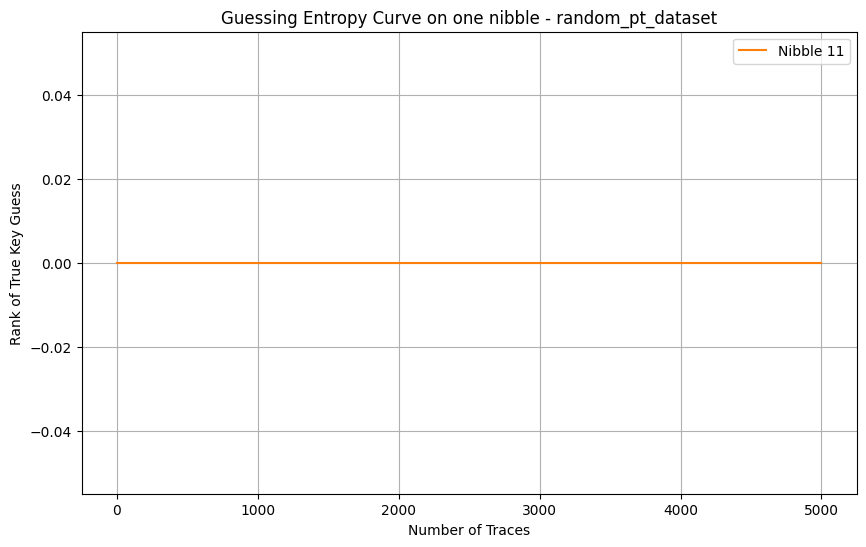

<Figure size 640x480 with 0 Axes>

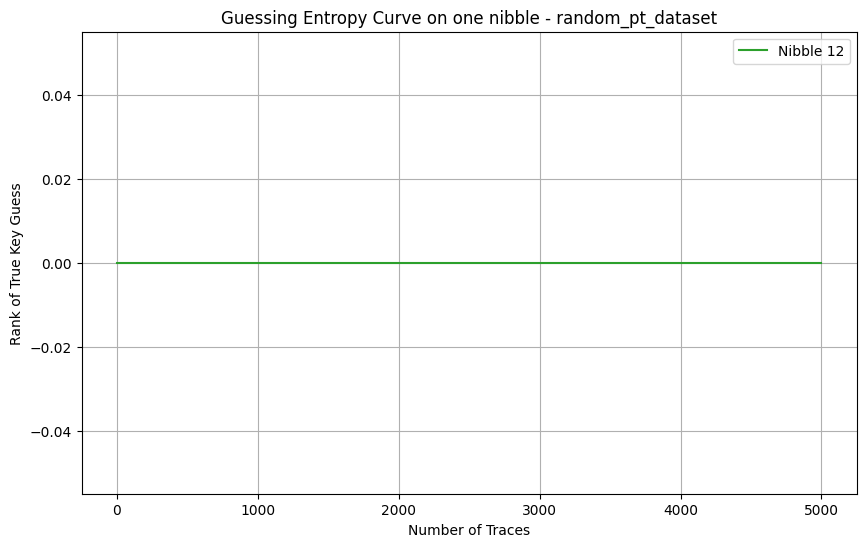

<Figure size 640x480 with 0 Axes>

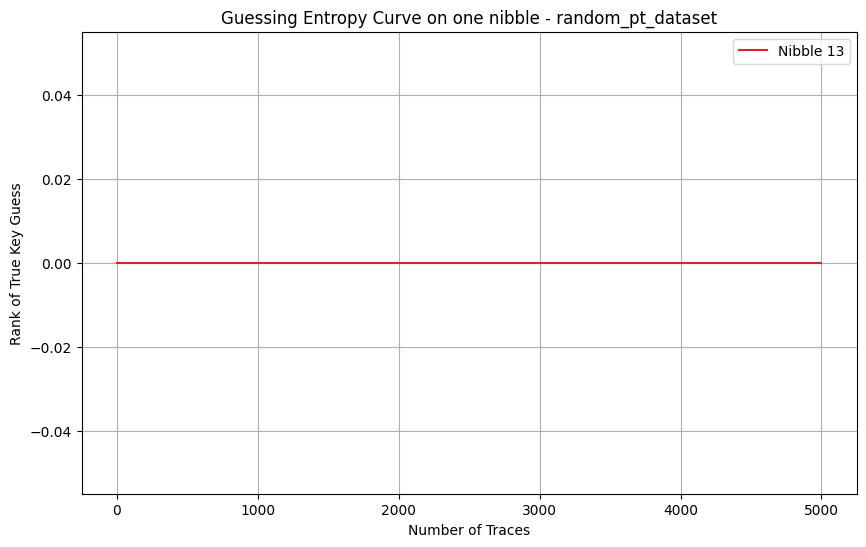

<Figure size 640x480 with 0 Axes>

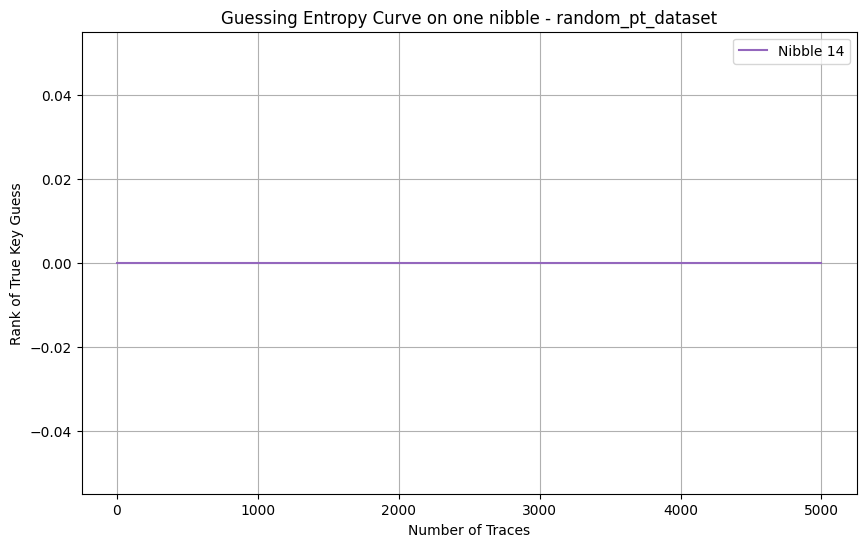

<Figure size 640x480 with 0 Axes>

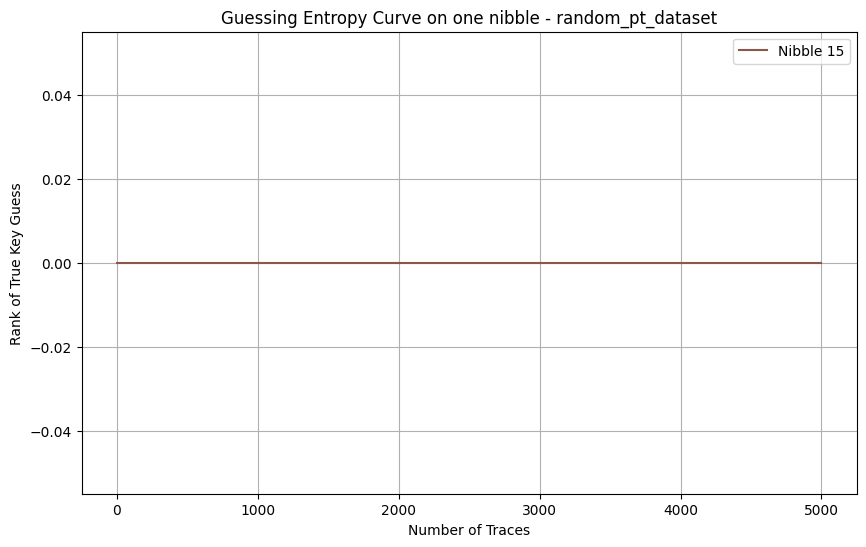

<Figure size 640x480 with 0 Axes>

In [179]:
load_and_plot_ge_by_one(ge_data_path, "random_pt_dataset", "pois", f"one nibble")

## Conclusion on POIs Method

The Guessing Entropy analysis for all 16 nibbles reveals that the POIs method performs exceptionally well on all datasets:

- All nibbles except nibble 6 immediately converge to rank 0, indicating that the models were able to perfectly identify the correct key nibble right from the start.

- Nibble 6 is the only exception, starting at rank 1, but still demonstrating near-perfect performance. This suggests either a minor misclassification or slightly weaker leakage distinguishability in that nibble's position.

- The flat GE curves at rank 0 confirm very high signal-to-noise ratio (SNR) in the selected POIs under random plaintext input, enabling rapid and confident key recovery across all positions.

This indicates that the POIs chosen for this dataset are highly effective, and that the leakage model generalizes extremely well when plaintexts are fixed or randomly distributed.

### fixed_dataset_1

In [180]:
summary_ge(ge_data_path, "fixed_dataset_1", "pois")

Nibble 0 reached rank 0 at Trace: 0
Nibble 1 reached rank 0 at Trace: 0
Nibble 2 reached rank 0 at Trace: 0
Nibble 3 reached rank 0 at Trace: 0
Nibble 4 reached rank 0 at Trace: 0
Nibble 5 reached rank 0 at Trace: 0
Nibble 6 reached rank 0 at Trace: 1
Nibble 7 reached rank 0 at Trace: 0
Nibble 8 reached rank 0 at Trace: 0
Nibble 9 reached rank 0 at Trace: 0
Nibble 10 reached rank 0 at Trace: 0
Nibble 11 reached rank 0 at Trace: 0
Nibble 12 reached rank 0 at Trace: 0
Nibble 13 reached rank 0 at Trace: 0
Nibble 14 reached rank 0 at Trace: 0
Nibble 15 reached rank 0 at Trace: 0


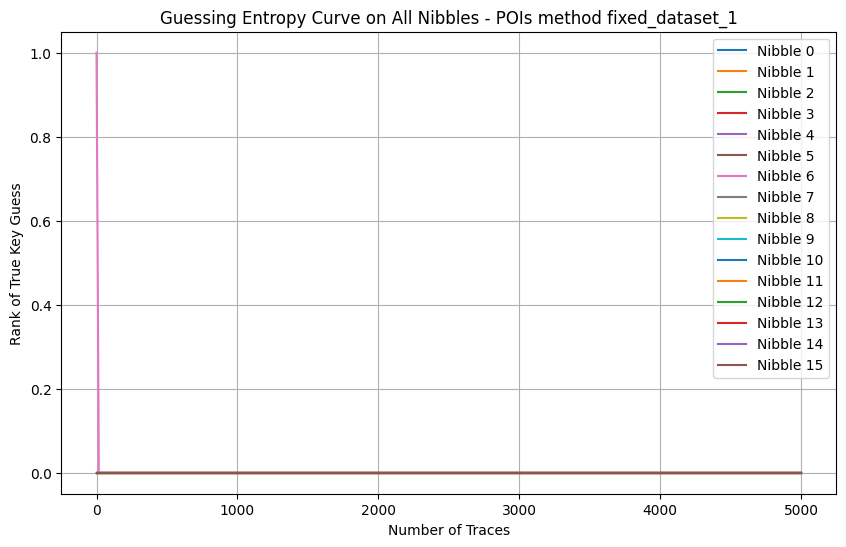

<Figure size 640x480 with 0 Axes>

In [181]:
load_and_plot_ge_all(ge_data_path, "fixed_dataset_1", "pois", "ge_all_nibbles_pois", "All Nibbles - POIs method")

In [182]:
# load_and_plot_ge_by_one(ge_data_path, "fixed_dataset_1", "pois", f"one nibble")

### fixed_dataset_2

In [183]:
summary_ge(ge_data_path, "fixed_dataset_2", "pois")

Nibble 0 reached rank 0 at Trace: 0
Nibble 1 reached rank 0 at Trace: 0
Nibble 2 reached rank 0 at Trace: 0
Nibble 3 reached rank 0 at Trace: 0
Nibble 4 reached rank 0 at Trace: 0
Nibble 5 reached rank 0 at Trace: 0
Nibble 6 reached rank 0 at Trace: 1
Nibble 7 reached rank 0 at Trace: 0
Nibble 8 reached rank 0 at Trace: 0
Nibble 9 reached rank 0 at Trace: 0
Nibble 10 reached rank 0 at Trace: 0
Nibble 11 reached rank 0 at Trace: 0
Nibble 12 reached rank 0 at Trace: 0
Nibble 13 reached rank 0 at Trace: 0
Nibble 14 reached rank 0 at Trace: 0
Nibble 15 reached rank 0 at Trace: 0


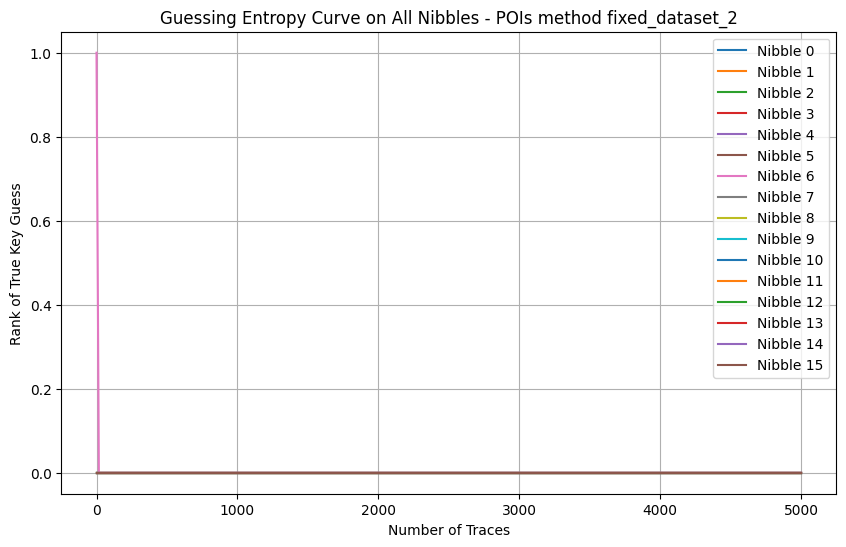

<Figure size 640x480 with 0 Axes>

In [184]:
load_and_plot_ge_all(ge_data_path, "fixed_dataset_2", "pois", "ge_all_nibbles_pois", "All Nibbles - POIs method")

In [185]:
# load_and_plot_ge_by_one(ge_data_path, "fixed_dataset_2", "pois", f"one nibble")

## Range POIs method

## random_pt_dataset

In [186]:
summary_ge(ge_data_path, "random_pt_dataset", "range")

Nibble 0 reached rank 0 at Trace: 0
Nibble 1 reached rank 0 at Trace: 0
Nibble 2 reached rank 0 at Trace: 3
Nibble 3 reached rank 0 at Trace: 0
Nibble 4 reached rank 0 at Trace: 5
Nibble 5 reached rank 0 at Trace: 1
Nibble 6 reached rank 0 at Trace: 6
Nibble 7 reached rank 0 at Trace: 0
Nibble 8 reached rank 0 at Trace: 0
Nibble 9 reached rank 0 at Trace: 1
Nibble 10 reached rank 0 at Trace: 3
Nibble 11 reached rank 0 at Trace: 0
Nibble 12 reached rank 0 at Trace: 0
Nibble 13 reached rank 0 at Trace: 0
Nibble 14 reached rank 0 at Trace: 0
Nibble 15 reached rank 0 at Trace: 0


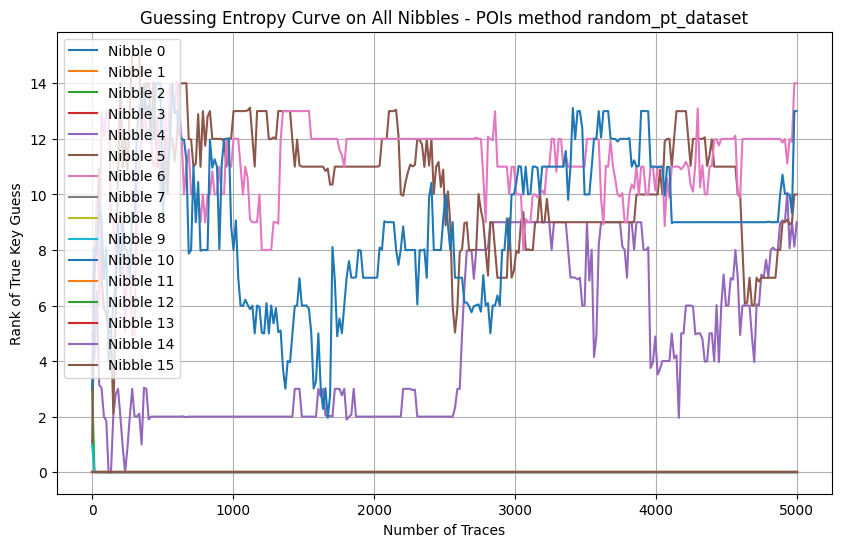

<Figure size 640x480 with 0 Axes>

In [187]:
load_and_plot_ge_all(ge_data_path, "random_pt_dataset", "range", "ge_all_nibbles_pois", "All Nibbles - POIs method")

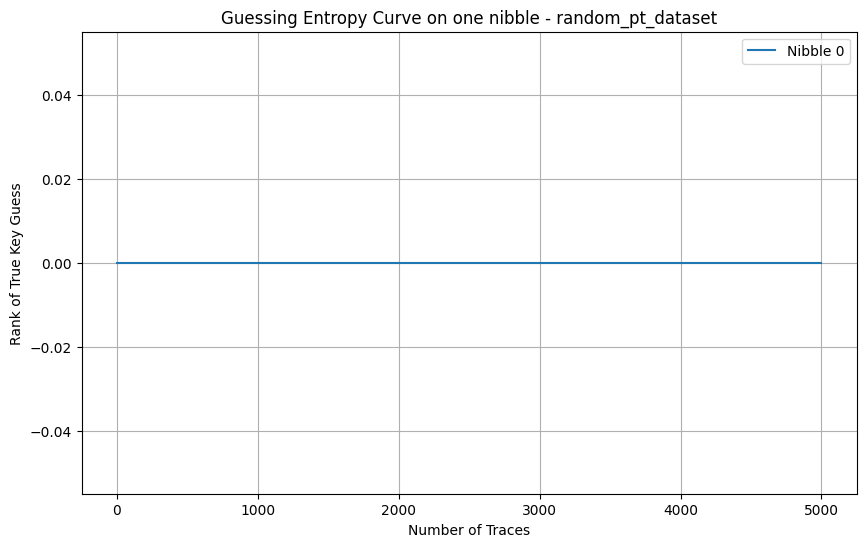

<Figure size 640x480 with 0 Axes>

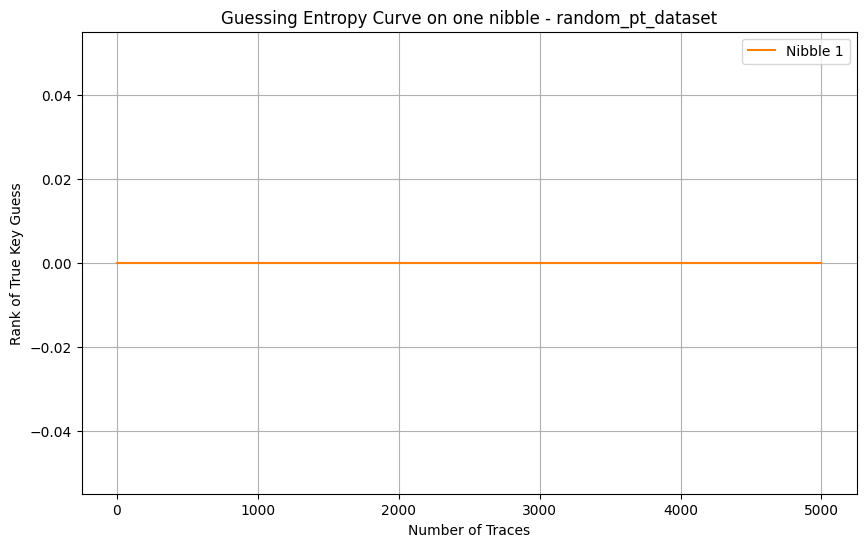

<Figure size 640x480 with 0 Axes>

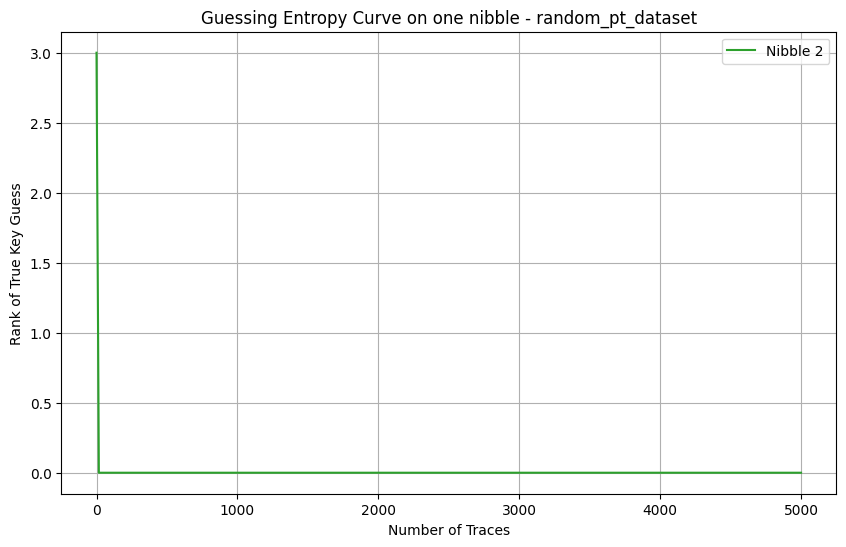

<Figure size 640x480 with 0 Axes>

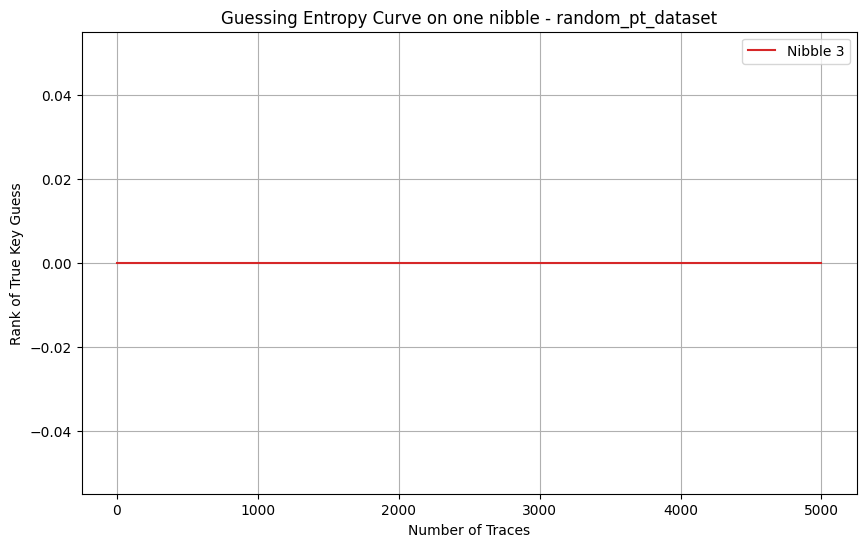

<Figure size 640x480 with 0 Axes>

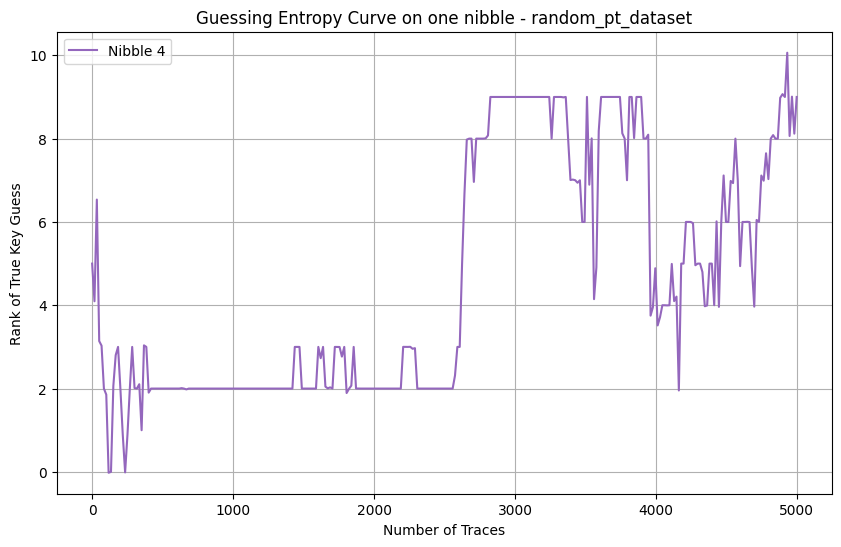

<Figure size 640x480 with 0 Axes>

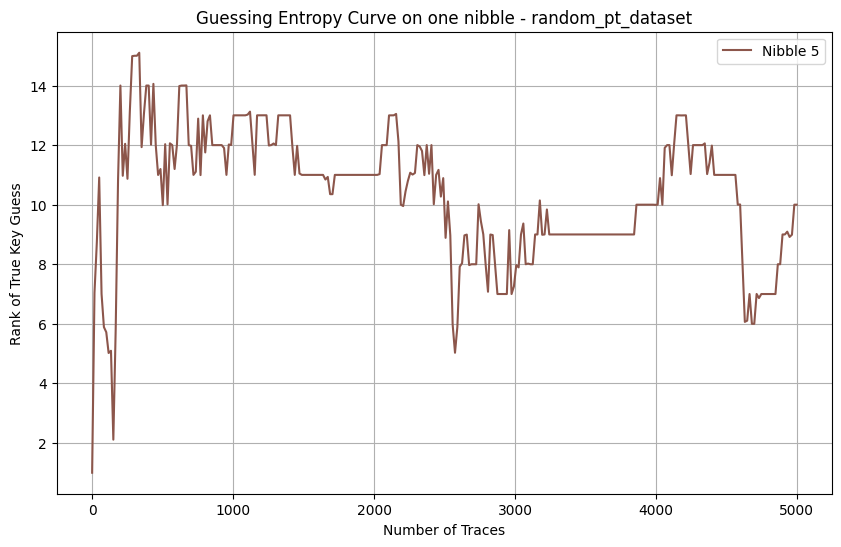

<Figure size 640x480 with 0 Axes>

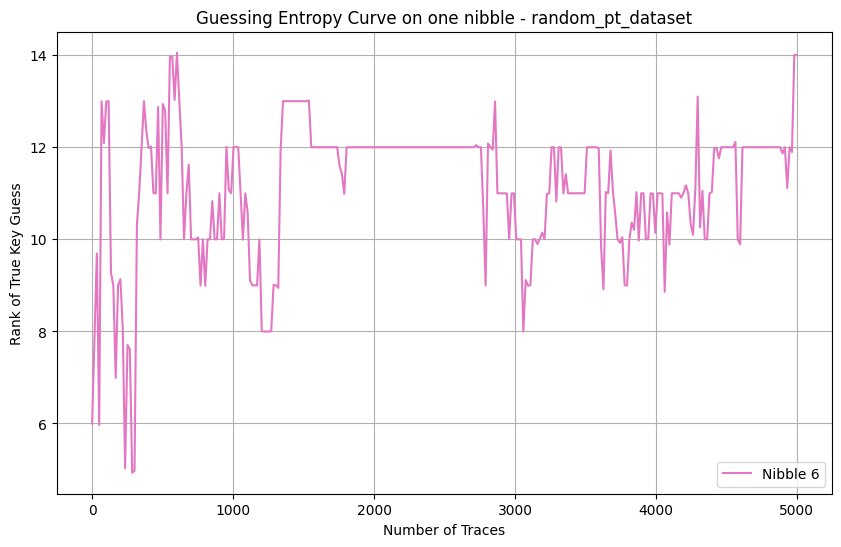

<Figure size 640x480 with 0 Axes>

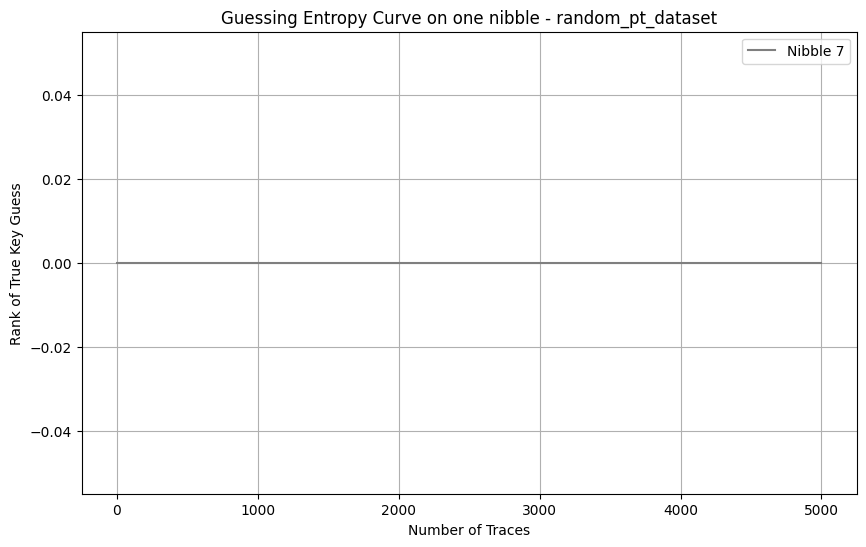

<Figure size 640x480 with 0 Axes>

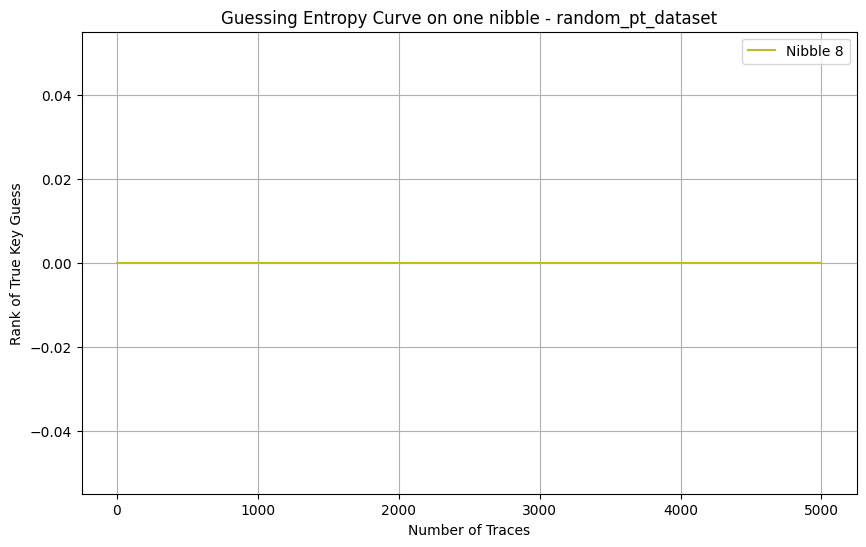

<Figure size 640x480 with 0 Axes>

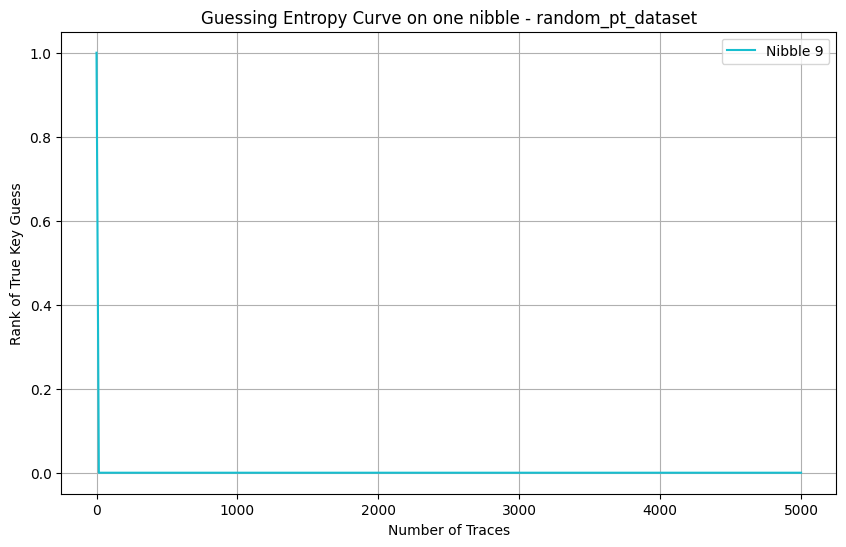

<Figure size 640x480 with 0 Axes>

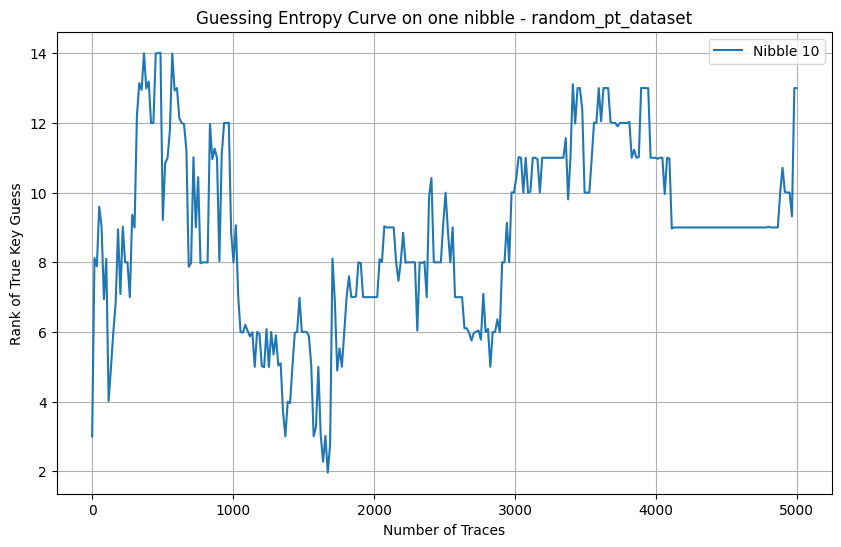

<Figure size 640x480 with 0 Axes>

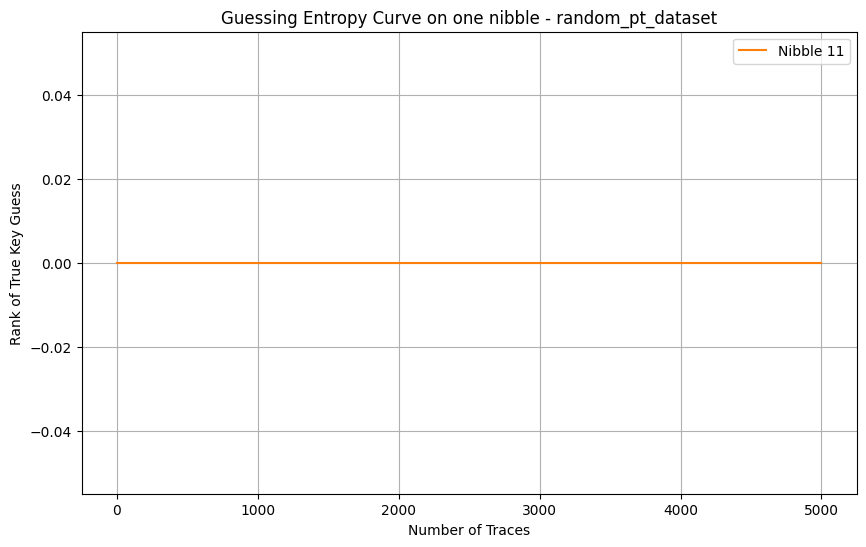

<Figure size 640x480 with 0 Axes>

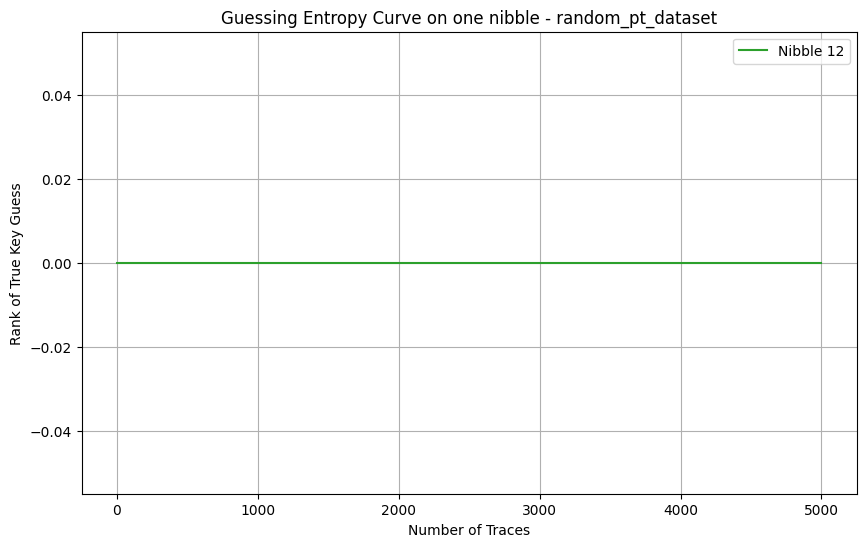

<Figure size 640x480 with 0 Axes>

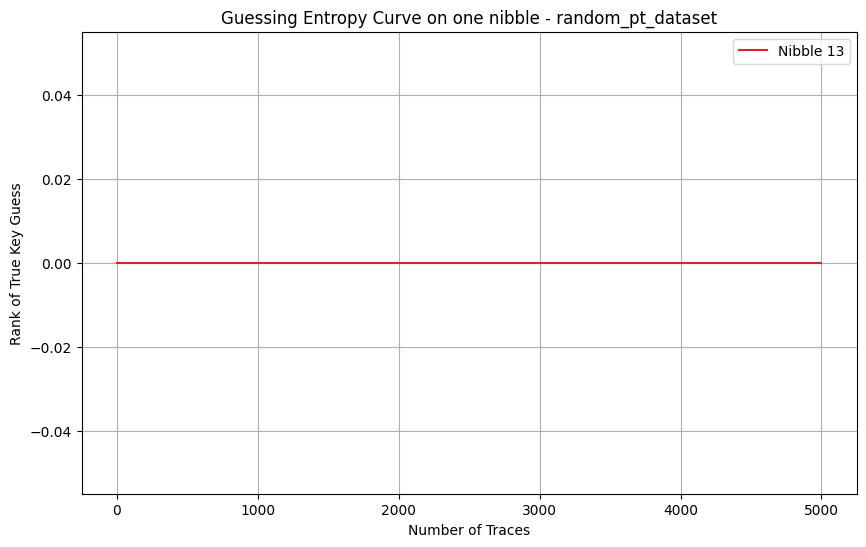

<Figure size 640x480 with 0 Axes>

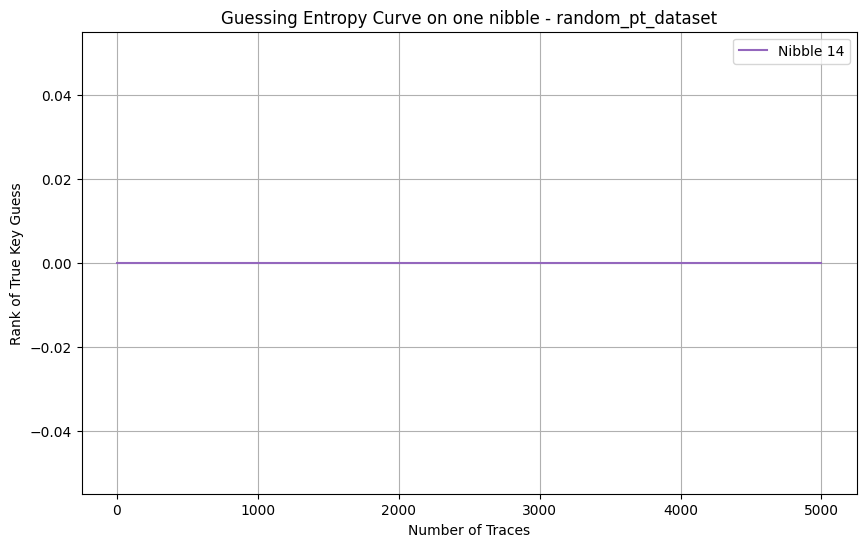

<Figure size 640x480 with 0 Axes>

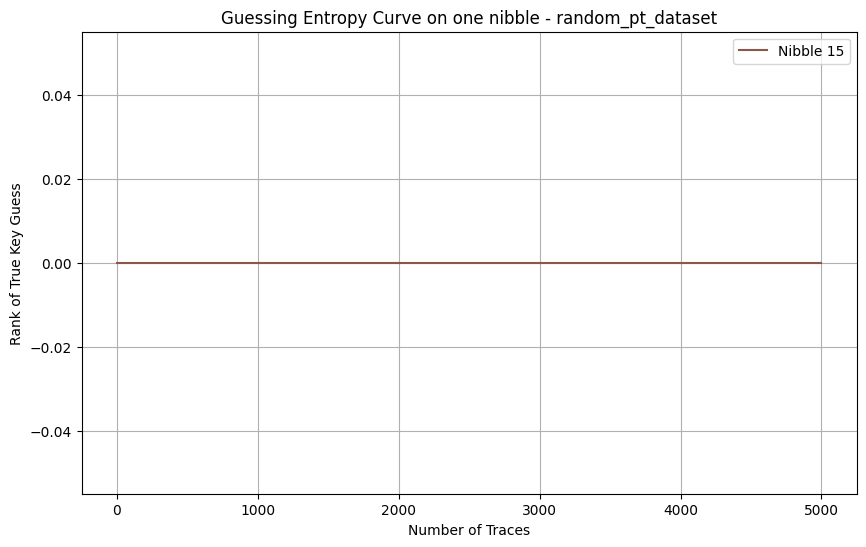

<Figure size 640x480 with 0 Axes>

In [188]:
load_and_plot_ge_by_one(ge_data_path, "random_pt_dataset", "range", f"one nibble")

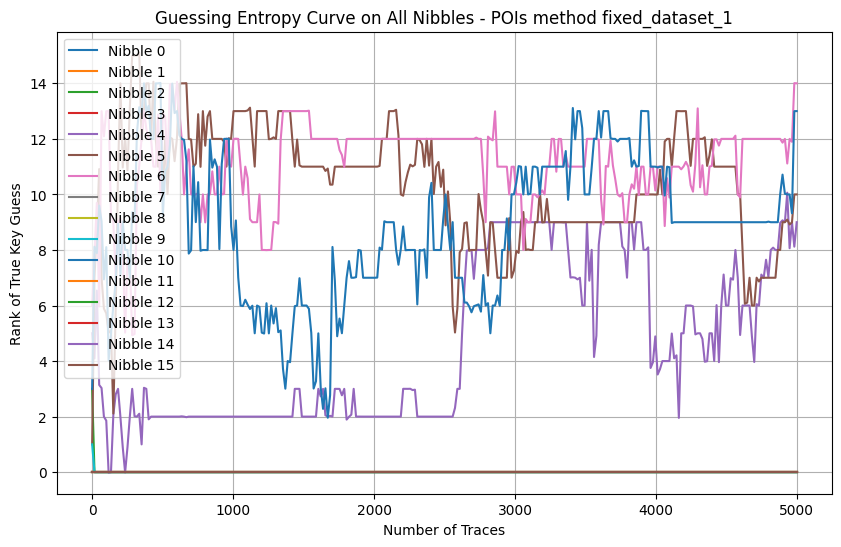

<Figure size 640x480 with 0 Axes>

In [189]:
load_and_plot_ge_all(ge_data_path, "fixed_dataset_1", "range", "ge_all_nibbles_pois", "All Nibbles - POIs method")

In [190]:
# load_and_plot_ge_by_one(ge_data_path, "fixed_dataset_1", "range", f"one nibble")

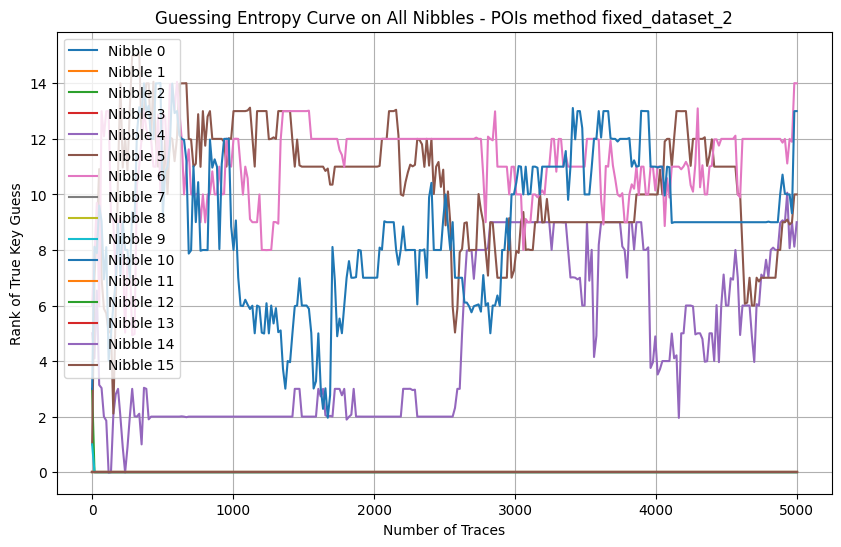

<Figure size 640x480 with 0 Axes>

In [191]:
load_and_plot_ge_all(ge_data_path, "fixed_dataset_2", "range", "ge_all_nibbles_pois", "All Nibbles - POIs method")

In [192]:
# load_and_plot_ge_by_one(ge_data_path, "fixed_dataset_2", "range", f"one nibble")

## Conclusion on Range POIs Guessing Entropy

The GE curves across all 16 nibbles using the Range POIs method reveal varied levels of model success in recovering the correct key nibbles:

- Highly effective recovery is observed for:

    - Nibble 2: Starts at rank 3, quickly reaches rank 0 within very few traces and remains stable.

    - Nibble 1: Starts at rank 1 and also converges immediately to rank 0, showing strong signal-leakage correlation.


- Poor recovery is evident in:

    - Nibbles 4, 5, 6, and 10, which exhibit high instability and fail to consistently identify the correct key, suggesting weak or noisy leakage in their corresponding bits under the selected POIs.

This evaluation indicates that the Range POI selection captures distinguishable leakage for some key bytes but fails for others—possibly due to either suboptimal trace alignment, leakage masking, or poor SNR in those specific nibbles.